# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'USDCHF'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

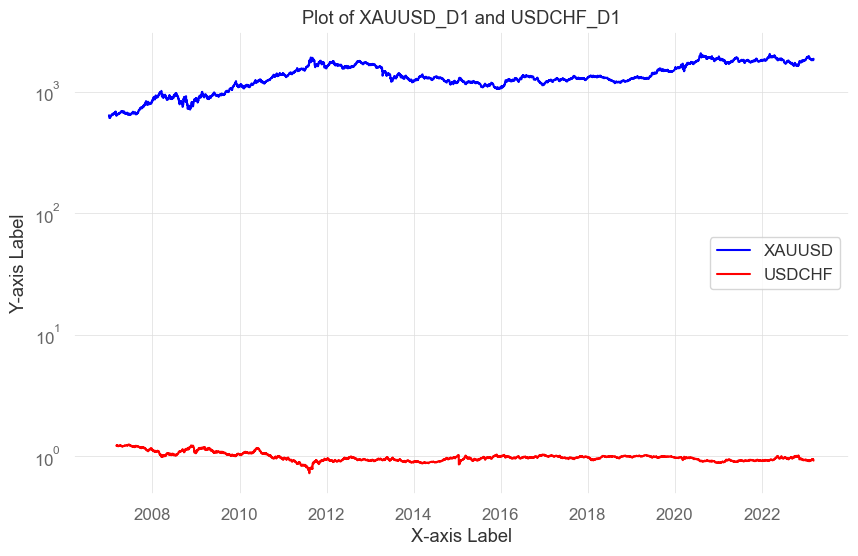

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          5.016e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:28:10   Log-Likelihood:                         -37297.
No. Observations:                5003   AIC:                                  7.460e+04
Df Residuals:                    5002   BIC:                                  7.460e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1342.1898      5.993    223.972      0.000    1330.442    1353.938
==============================================================================
Omnibus:                      156.021   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.489
Skew:                          -0.415   Prob(JB):                     1.41e-35
Kurtosis:                       2.714   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.87439
Multiple (Buy-and-Hold):     3.702206
--------------------------------------
Out-/Underperformance:       -2.827816


CAGR:                        -0.00836
Annualized Mean:             -0.008395
Annualized Std:              0.032383
Sharpe Ratio:                -0.259241
Sortino Ratio:               -0.347339
Maximum Drawdown:            0.182877
Calmar Ratio:                -0.045713
Max Drawdown Duration:       5741 Days
Kelly Criterion:             -7.517622


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -13.29%
CAGR﹪                     -0.61%

Sharpe                     -0.23
Prob. Sharpe Ratio         14.85%
Smart Sharpe               -0.23
Sortino                    -0.31
Smart Sortino              -0.31
Sortino/√2                 -0.22
Smart Sortino/√2           -0.22
Omega                      0.96

Max Drawdown               -18.74%
Longest DD Days            5741
Volatility (ann.)          2.91%
Calmar                     -0.03
Skew                       -0.85
Kurtosis                   9.5

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.84%
Kelly Criterion            -2.2%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.3%
Expected Shortfall (cVaR)  -0.3%

Max Consecutive Wi

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-13,2018-04-19,2023-03-01,5741,-18.741628,-18.284149
2,2007-03-11,2007-04-18,2007-06-07,89,-0.719871,-0.704856
3,2007-03-07,2007-03-07,2007-03-08,2,-0.076721,-0.007148
4,2007-06-11,2007-06-11,2007-06-11,1,-0.025770,NaN


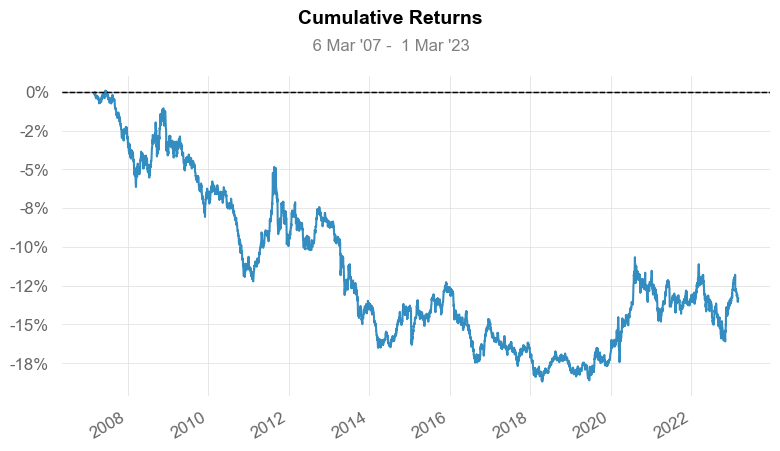

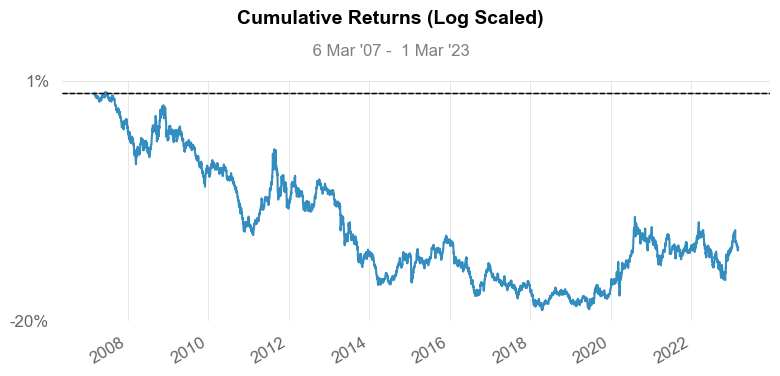

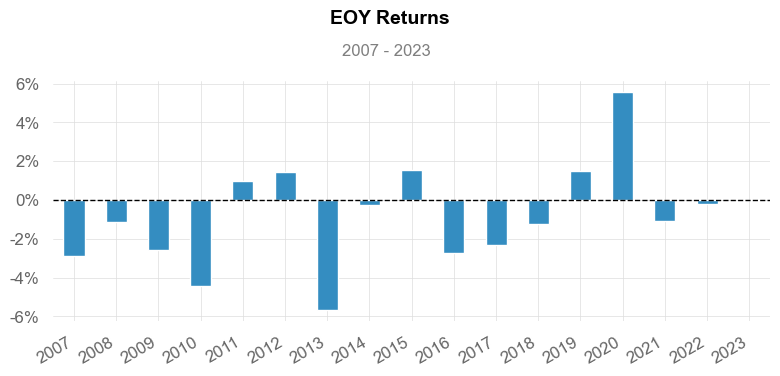

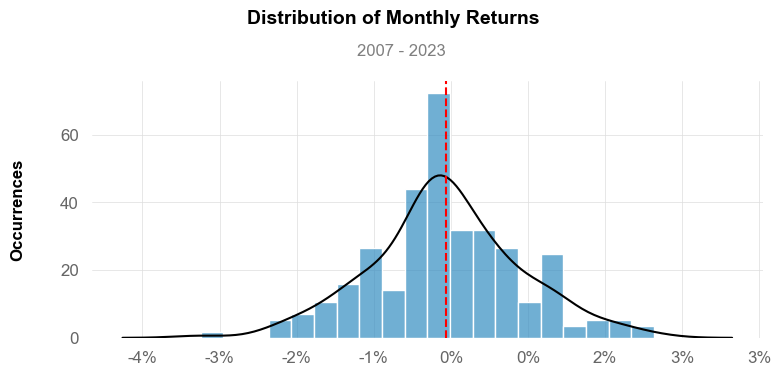

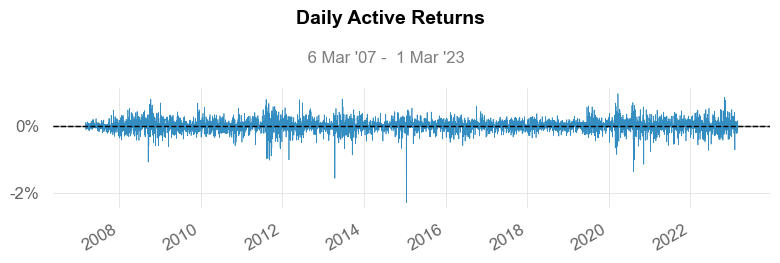

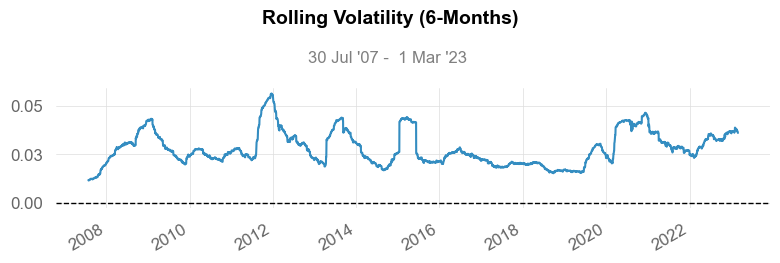

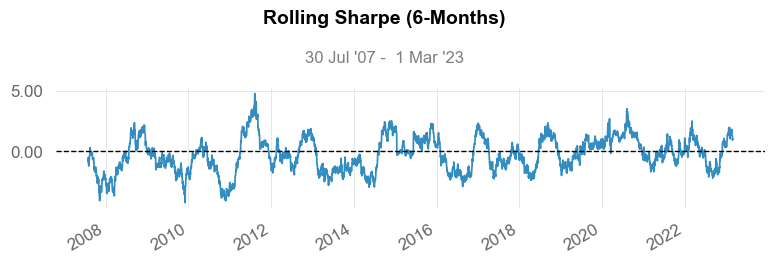

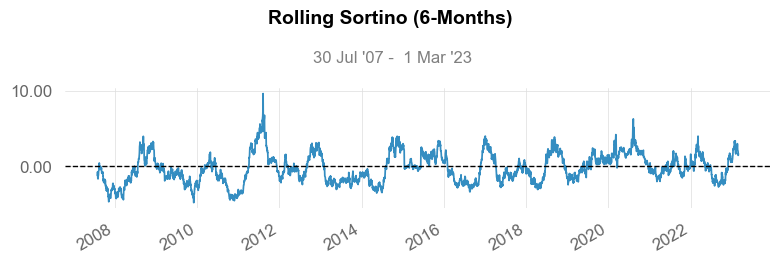

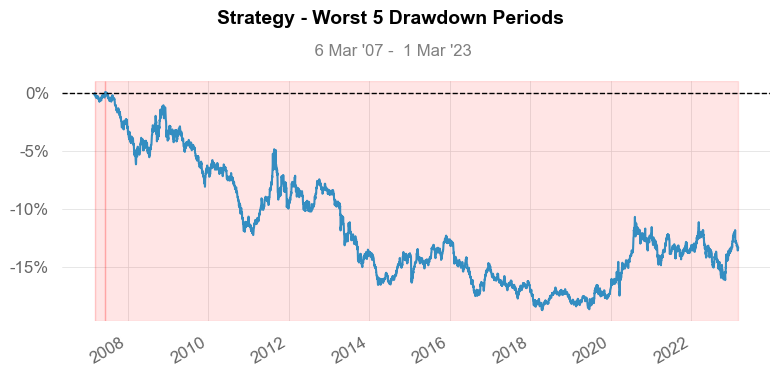

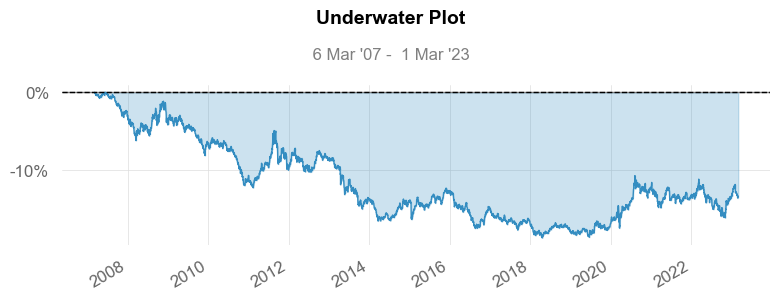

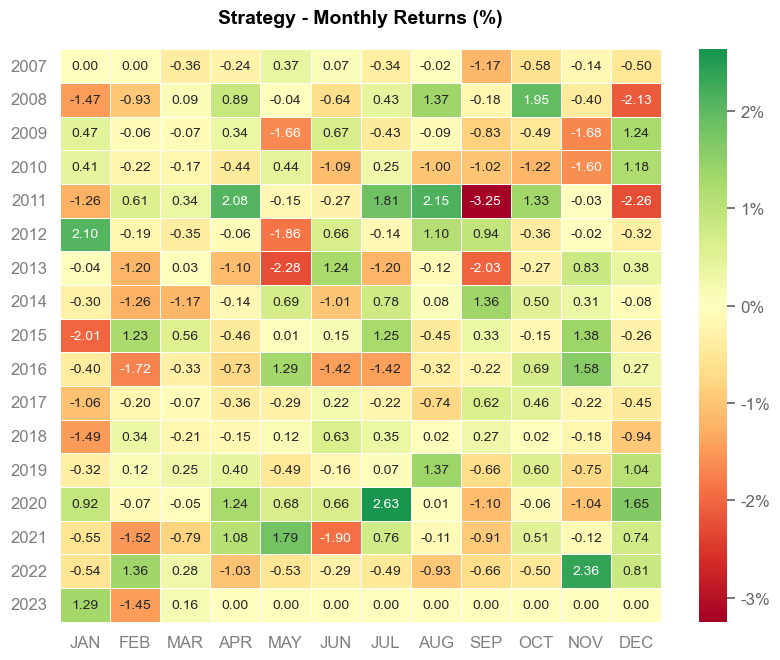

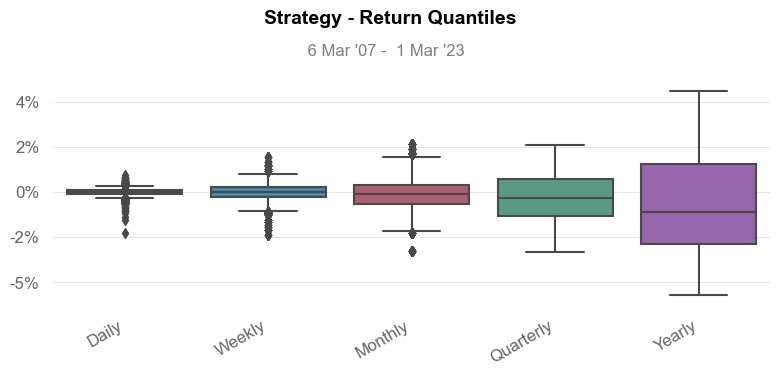

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

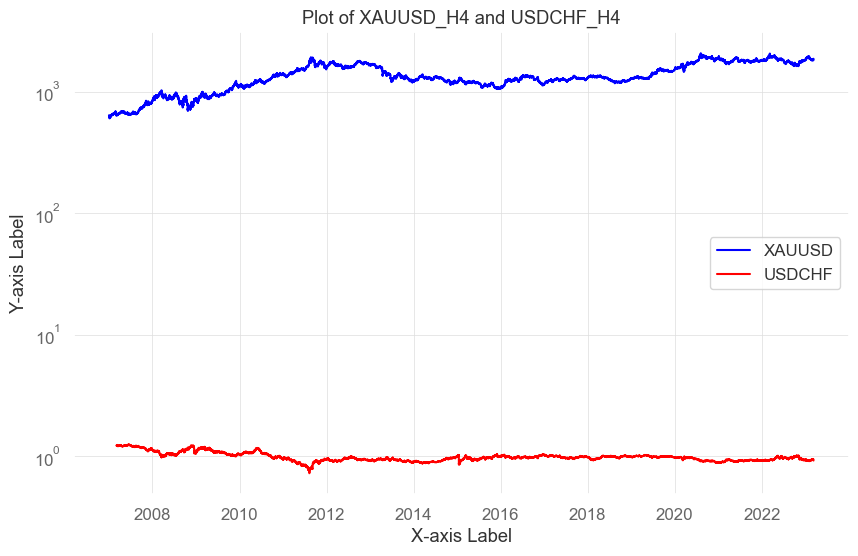

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          2.583e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:28:46   Log-Likelihood:                     -1.9238e+05
No. Observations:               25804   AIC:                                  3.848e+05
Df Residuals:                   25803   BIC:                                  3.848e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1341.6199      2.640    508.256      0.000    1336.446    1346.794
==============================================================================
Omnibus:                      809.074   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.695
Skew:                          -0.415   Prob(JB):                    2.51e-181
Kurtosis:                       2.712   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run()

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.887246
Multiple (Buy-and-Hold):     3.658525
--------------------------------------
Out-/Underperformance:       -2.771279


CAGR:                        -0.007454
Annualized Mean:             -0.007482
Annualized Std:              0.031461
Sharpe Ratio:                -0.237828
Sortino Ratio:               -0.325179
Maximum Drawdown:            0.17028
Calmar Ratio:                -0.043777
Max Drawdown Duration:       5740 Days
Kelly Criterion:             -7.064969


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -12.03%
CAGR﹪                     -0.55%

Sharpe                     -0.21
Prob. Sharpe Ratio         17.35%
Smart Sharpe               -0.21
Sortino                    -0.28
Smart Sortino              -0.28
Sortino/√2                 -0.2
Smart Sortino/√2           -0.2
Omega                      0.96

Max Drawdown               -17.4%
Longest DD Days            5741
Volatility (ann.)          2.88%
Calmar                     -0.03
Skew                       -0.83
Kurtosis                   9.38

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.75%
Kelly Criterion            -1.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.3%
Expected Shortfall (cVaR)  -0.3%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-13,2019-06-19,2023-03-01,5741,-17.397479,-16.710437
2,2007-03-11,2007-04-18,2007-06-07,89,-0.719461,-0.704456
3,2007-03-07,2007-03-07,2007-03-08,2,-0.076677,-0.007144
4,2007-06-11,2007-06-11,2007-06-11,1,-0.025755,NaN


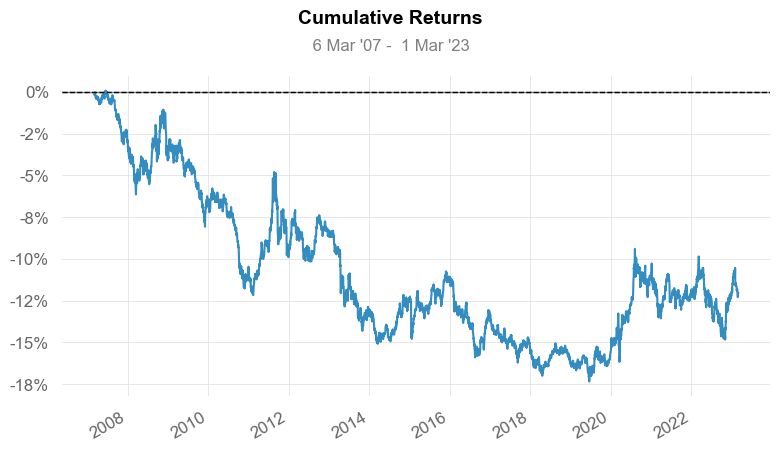

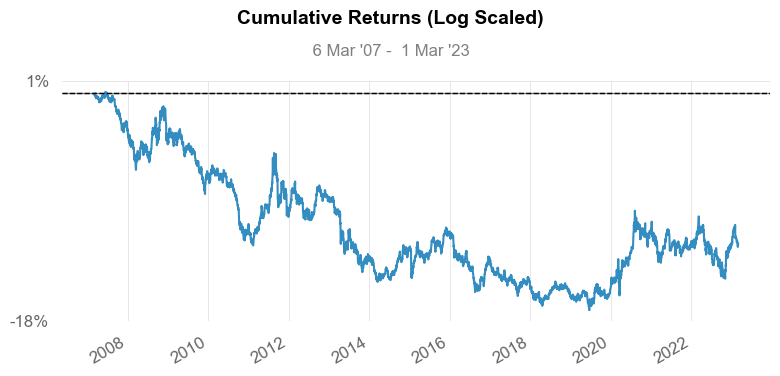

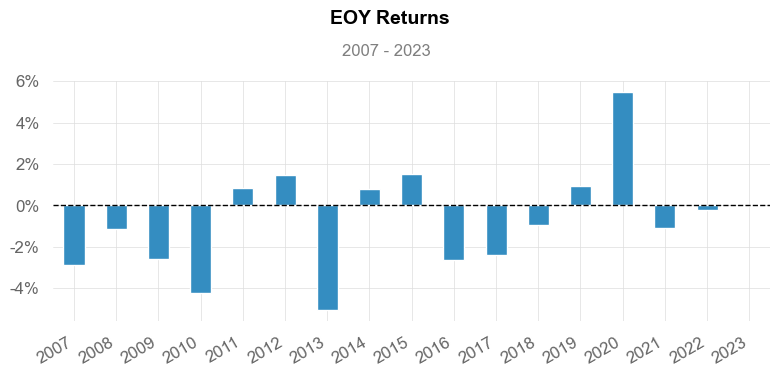

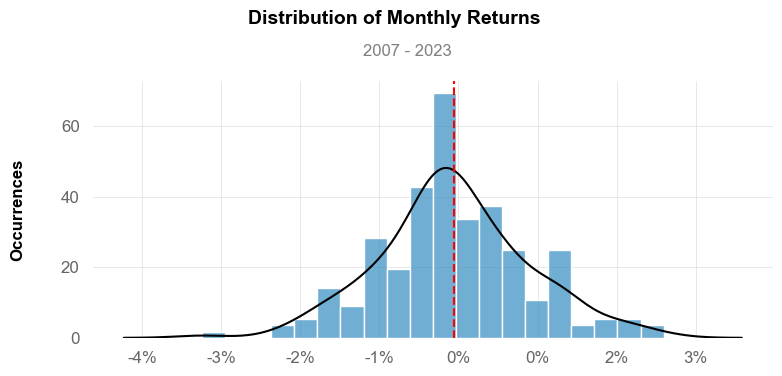

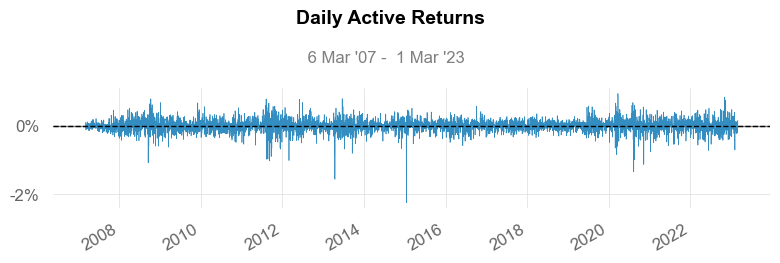

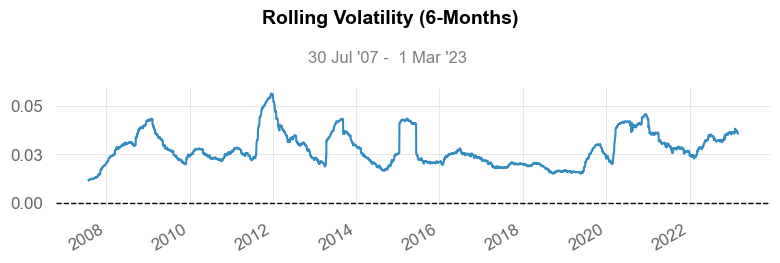

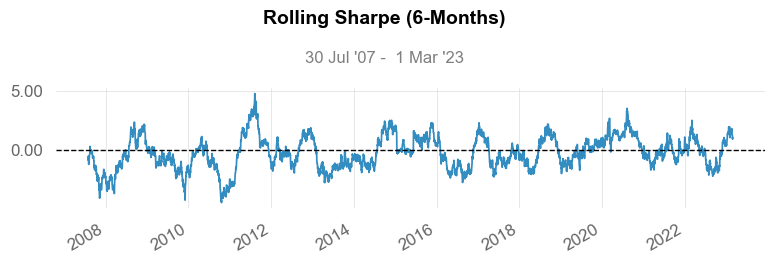

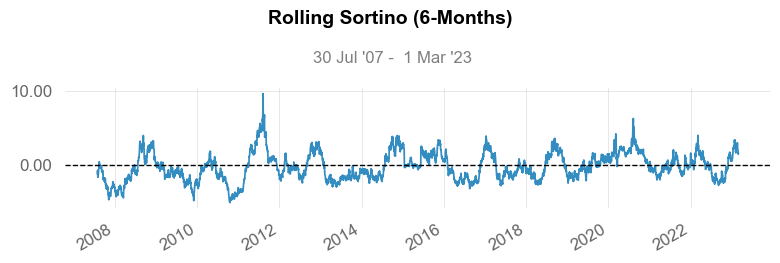

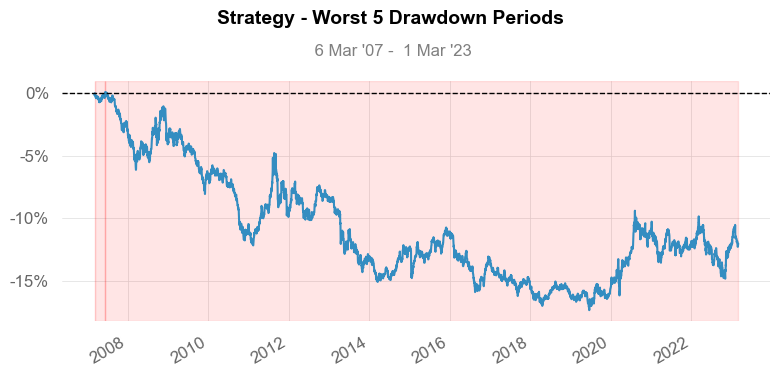

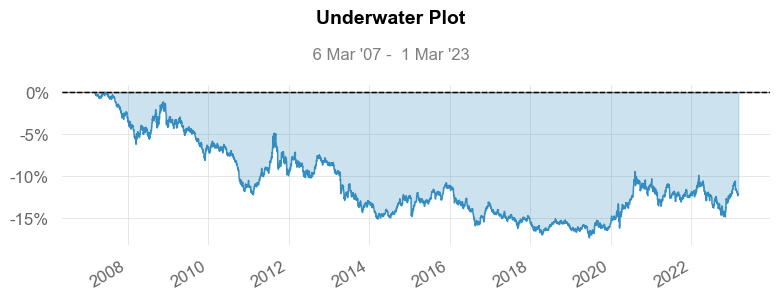

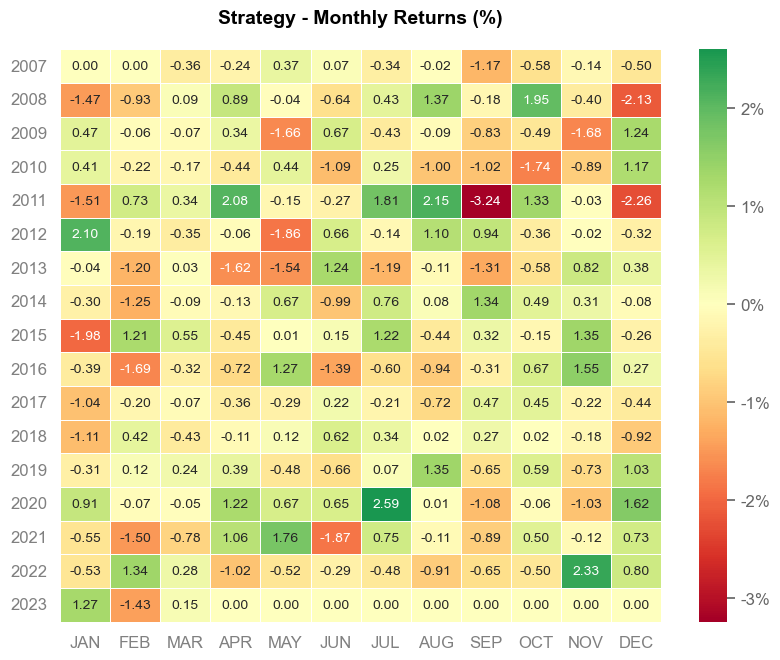

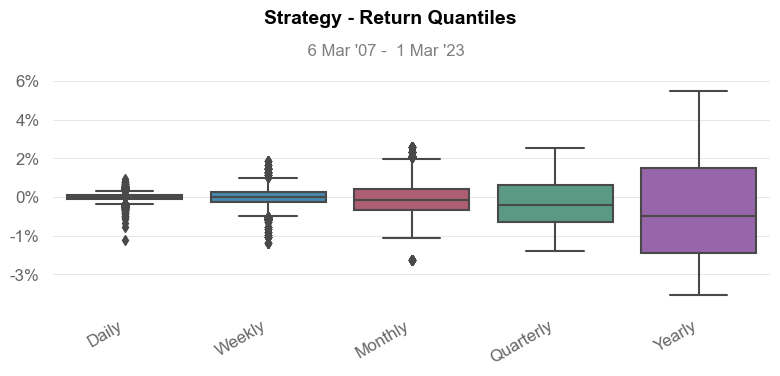

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

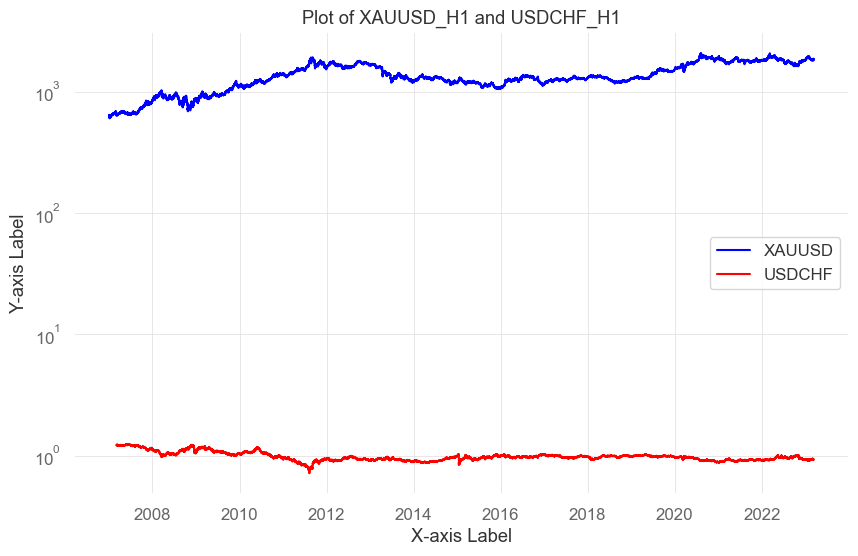

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          9.992e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:31:07   Log-Likelihood:                     -7.4445e+05
No. Observations:               99850   AIC:                                  1.489e+06
Df Residuals:                   99849   BIC:                                  1.489e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1341.5031      1.342    999.583      0.000    1338.873    1344.134
==============================================================================
Omnibus:                     3133.869   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3220.026
Skew:                          -0.415   Prob(JB):                         0.00
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run()

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -11.69%
CAGR﹪                     -0.54%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.03%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -17.06%
Longest DD Days            5741
Volatility (ann.)          2.87%
Calmar                     -0.03
Skew                       -0.85
Kurtosis                   9.67

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.73%
Kelly Criterion            -1.92%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.3%
Expected Shortfall (cVaR)  -0.3%

Max Consecutive Wi

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-13,2019-06-19,2023-03-01,5741,-17.060333,-16.393594
2,2007-03-11,2007-04-18,2007-06-07,89,-0.719107,-0.704109
3,2007-03-07,2007-03-07,2007-03-08,2,-0.076640,-0.007141
4,2007-06-11,2007-06-11,2007-06-11,1,-0.025742,NaN


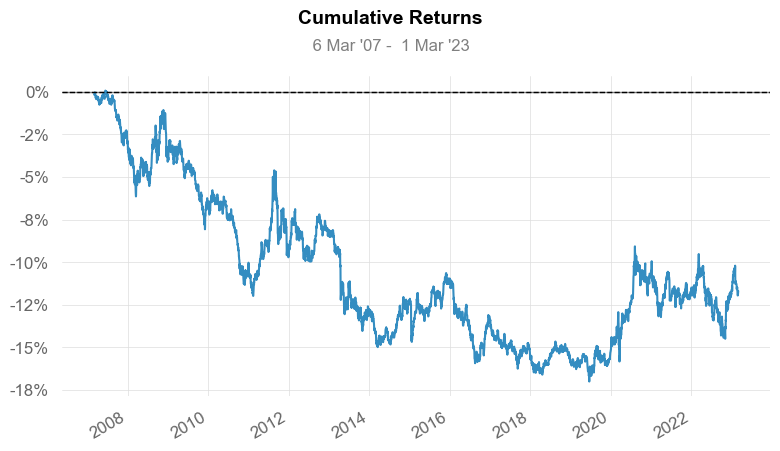

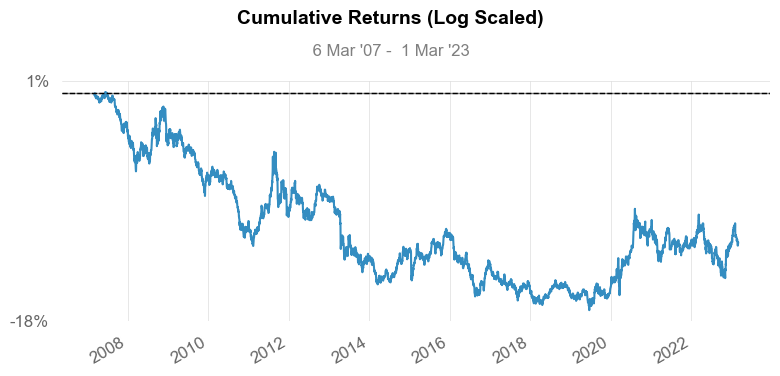

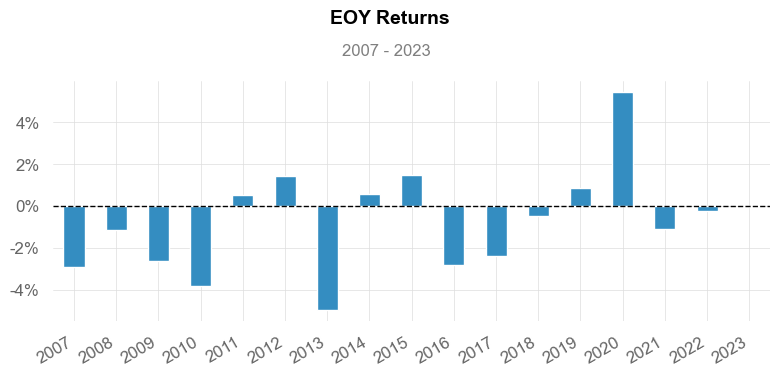

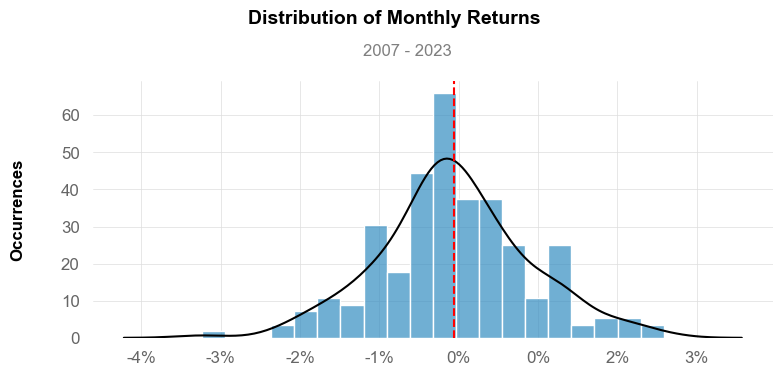

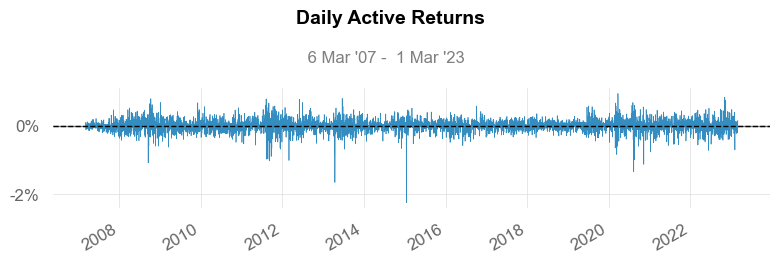

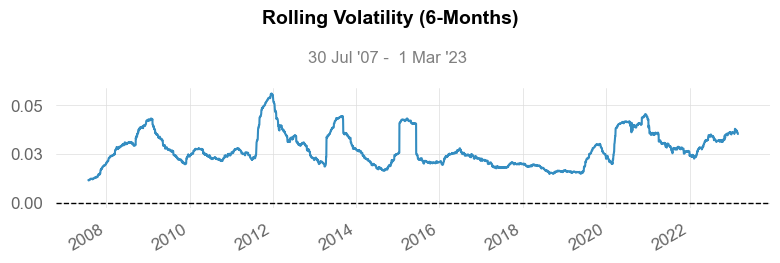

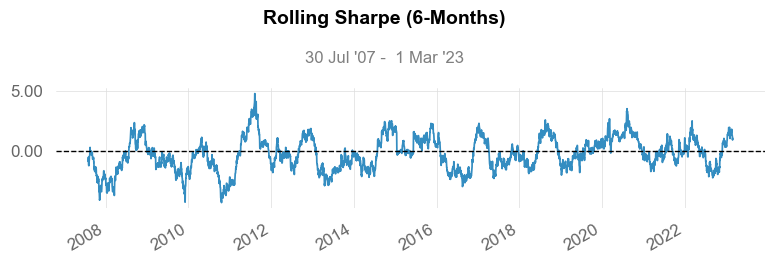

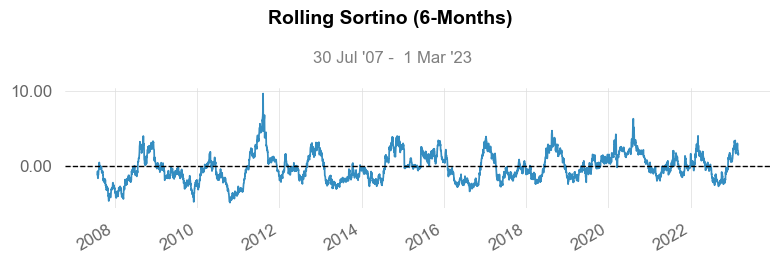

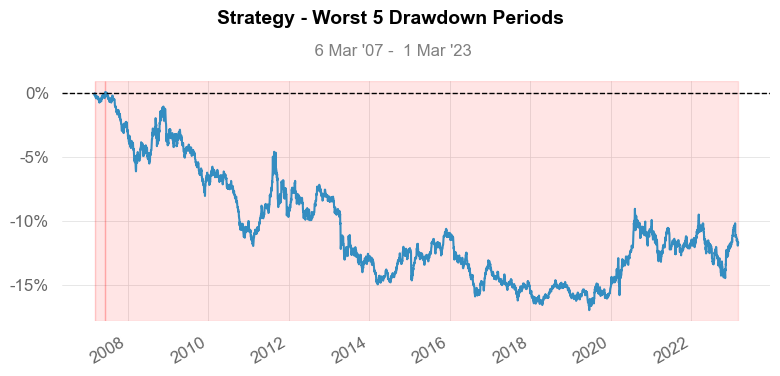

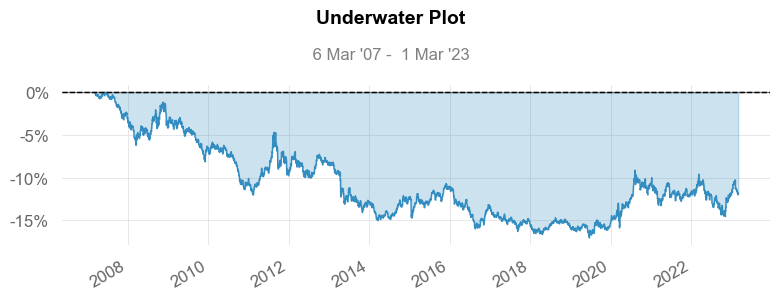

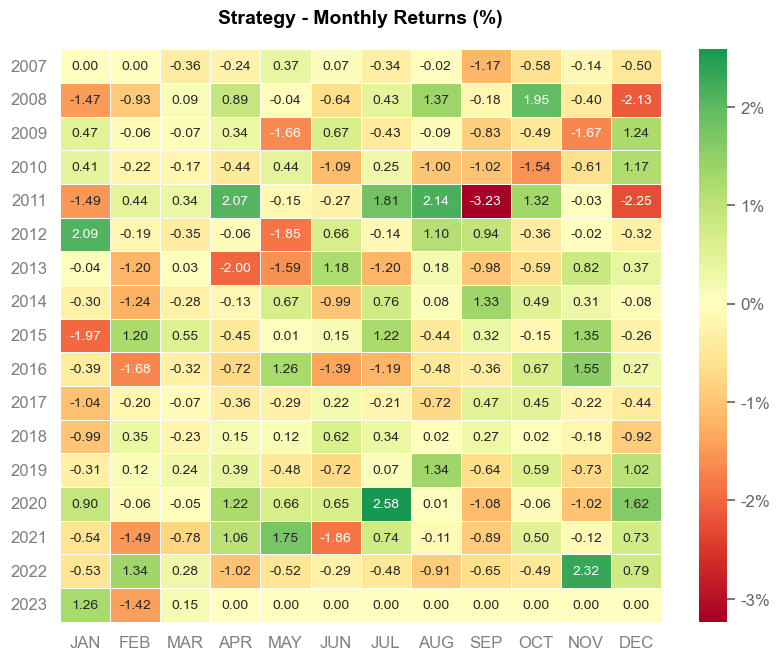

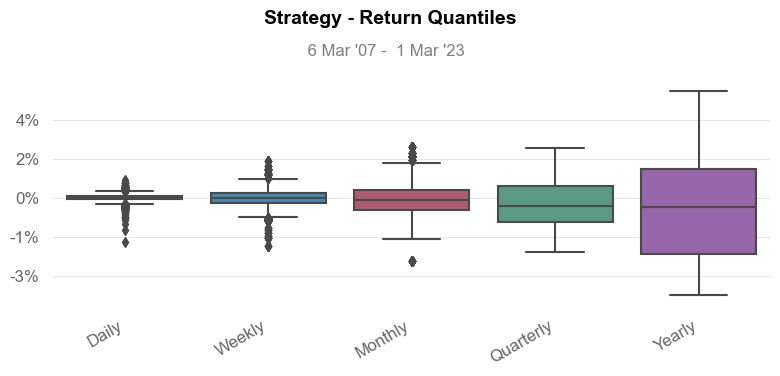

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

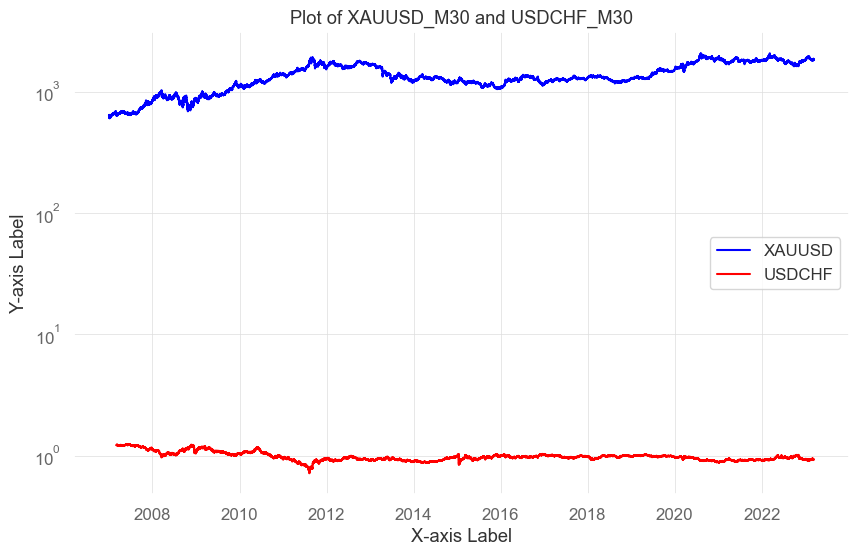

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                          1.998e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:36:48   Log-Likelihood:                     -1.4887e+06
No. Observations:              199676   AIC:                                  2.977e+06
Df Residuals:                  199675   BIC:                                  2.977e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1341.4817      0.949   1413.528      0.000    1339.622    1343.342
==============================================================================
Omnibus:                     6265.988   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6437.715
Skew:                          -0.415   Prob(JB):                         0.00
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run()

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -12.05%
CAGR﹪                     -0.55%

Sharpe                     -0.21
Prob. Sharpe Ratio         17.31%
Smart Sharpe               -0.21
Sortino                    -0.28
Smart Sortino              -0.28
Sortino/√2                 -0.2
Smart Sortino/√2           -0.2
Omega                      0.96

Max Drawdown               -17.42%
Longest DD Days            5741
Volatility (ann.)          2.88%
Calmar                     -0.03
Skew                       -0.9
Kurtosis                   10.31

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.75%
Kelly Criterion            -1.99%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.3%
Expected Shortfall (cVaR)  -0.3%

Max Consecutive Wi

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-06-13,2019-06-19,2023-03-01,5741,-17.419667,-16.782307
2,2007-03-11,2007-04-18,2007-06-07,89,-0.719107,-0.704109
3,2007-03-07,2007-03-07,2007-03-08,2,-0.076640,-0.007141
4,2007-06-11,2007-06-11,2007-06-11,1,-0.025742,NaN


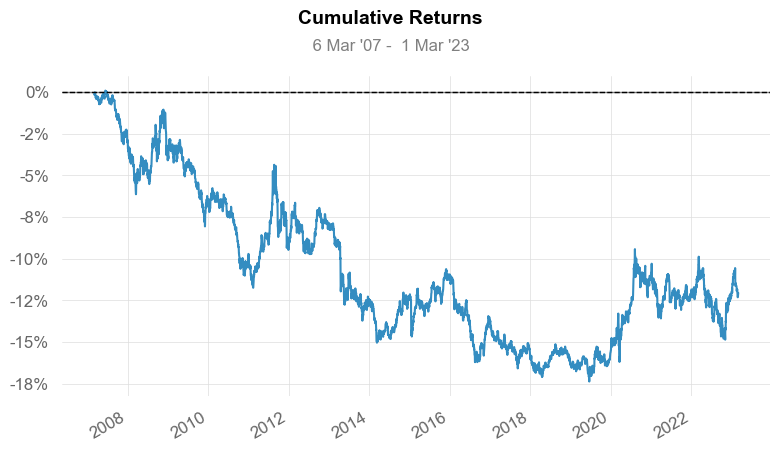

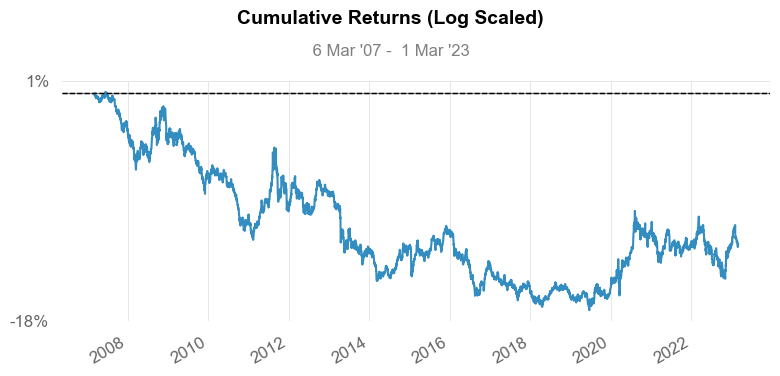

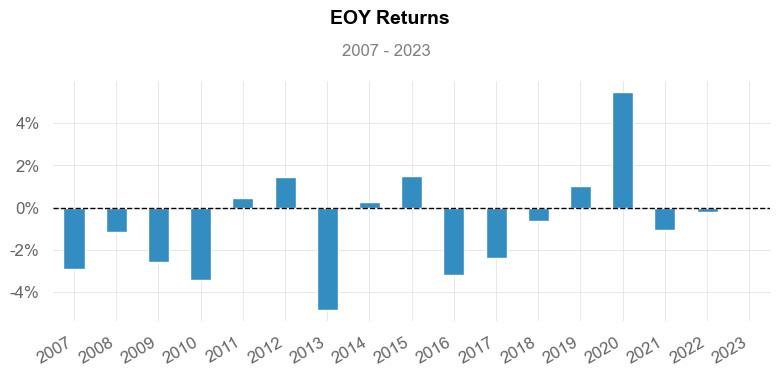

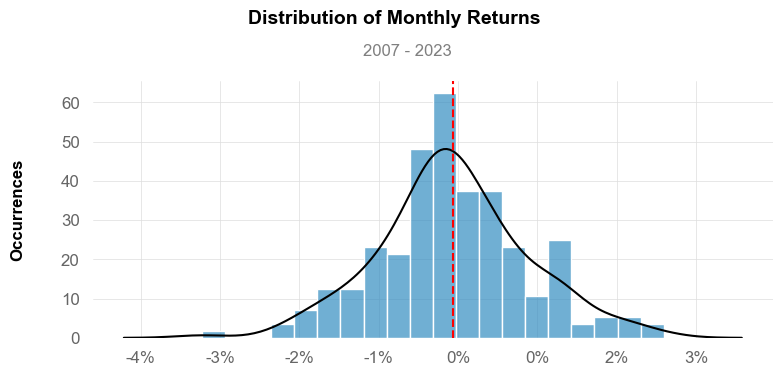

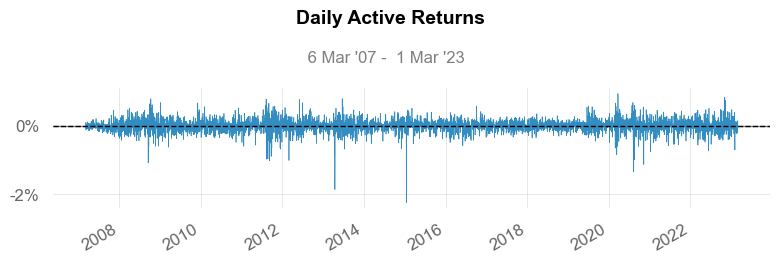

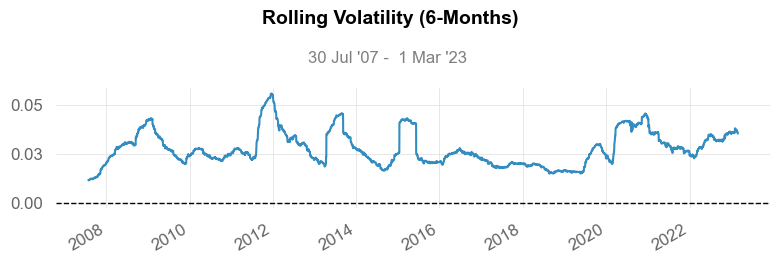

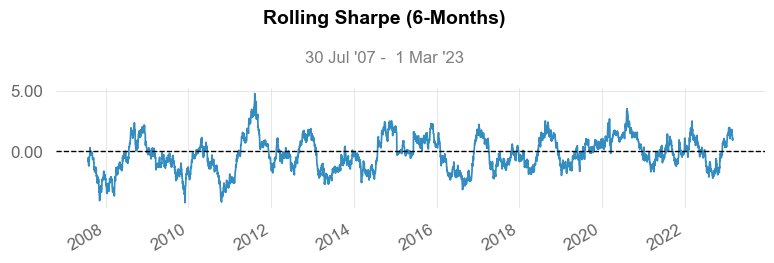

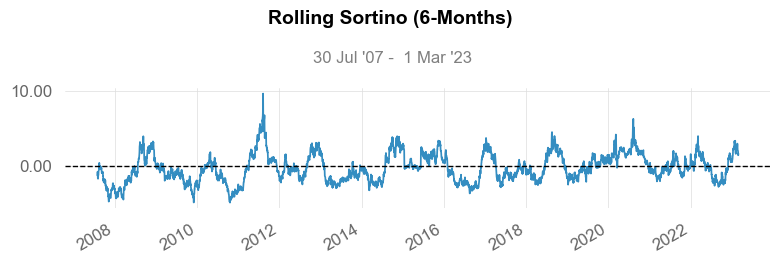

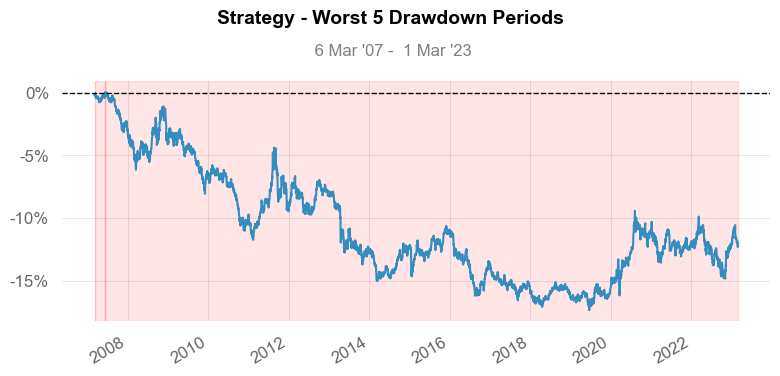

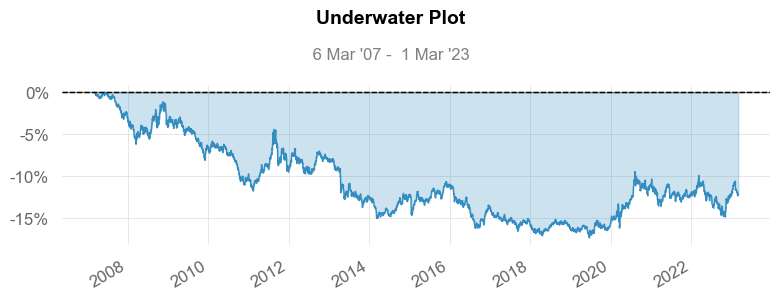

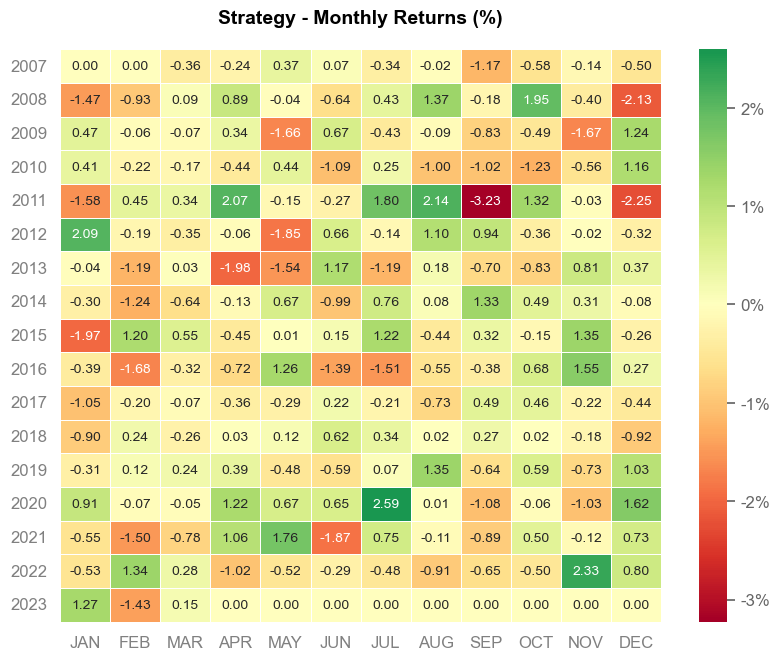

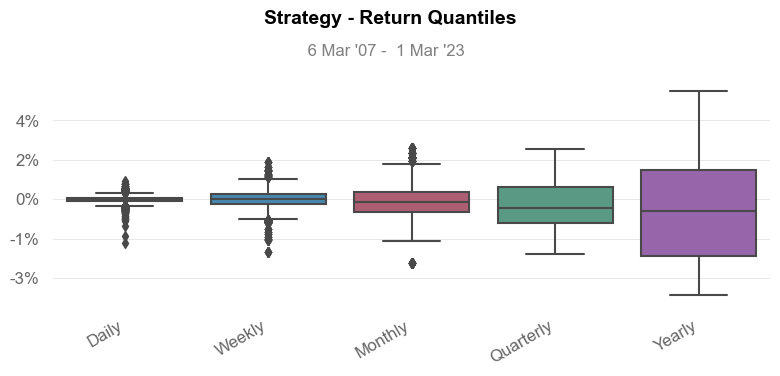

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())